In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing,
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
import datetime

In [3]:
items_cat = pd.read_csv("item_categories.csv")
items = pd.read_csv("items.csv")
train = pd.read_csv("sales_train.csv")
test = pd.read_csv("test.csv")
shop = pd.read_csv("shops.csv")
#submission = pd.read_csv("sample_submission.csv")

In [4]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [5]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


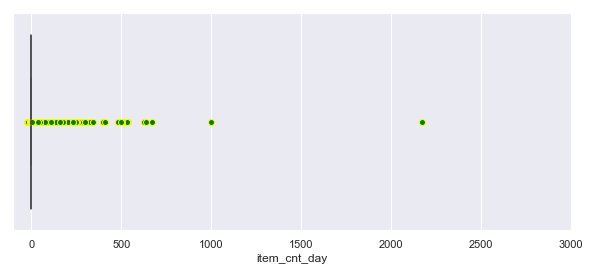

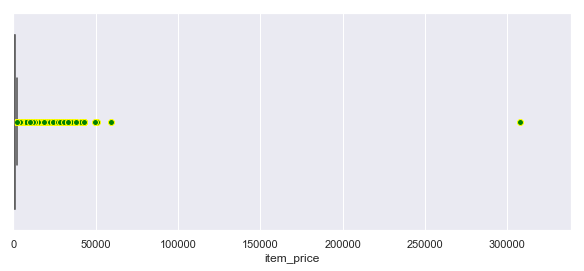

In [6]:
plt.figure(figsize=(10,4))
plt.xlim(-100, 3000)
flierprops = dict(marker='o', markerfacecolor='green', markersize=6,
                  linestyle='none', markeredgecolor='yellow')
sns.boxplot(x=train.item_cnt_day, flierprops=flierprops)

plt.figure(figsize=(10,4))
plt.xlim(train.item_price.min(), train.item_price.max()*1.1)
sns.boxplot(x=train.item_price, flierprops=flierprops)

In [7]:
train = train[(train.item_price < 300000 )& (train.item_cnt_day < 1000)]

In [8]:
median = train[(train.shop_id==32)&(train.item_id==2973)&(train.date_block_num==4)&(train.item_price>0)].item_price.median()
train.loc[train.item_price<0, 'item_price'] = median

In [9]:
train.loc[train.item_cnt_day < 1, "item_cnt_day"] = 0

In [10]:
train = train.rename(columns={'date':'DATE'})
train['DATE'] = pd.to_datetime(train['DATE'], format='%d.%m.%Y')
train['month'] = train['DATE'].dt.month
train['year'] = train['DATE'].dt.year

In [11]:
train = train.drop(['DATE'], axis=1)

In [12]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [13]:
shop.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [14]:
items_cat.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [15]:
items['item_name_length'] = items['item_name'].map(lambda x : len(x)) 
items['item_name_word_count'] = items['item_name'].map(lambda x : len(x.split(' ')))

In [16]:
items_cat['item_categories_name_length'] = items_cat['item_category_name'].map(lambda x : len(x)) 
items_cat['item_categories_name_word_count'] = items_cat['item_category_name'].map(lambda x : len(x.split(' ')))

In [17]:
shop['shop_name_length'] = shop['shop_name'].map(lambda x : len(x)) 
shop['shop_name_word_count'] = shop['shop_name'].map(lambda x : len(x.split(' ')))

In [18]:
items.head()

,item_name,item_id,item_category_id,item_name_length,item_name_word_count
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40,41,14
1,!ABBYY FineReader 12 Professional Edition Full...,1,76,68,9
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40,45,26
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40,47,26
4,***КОРОБКА (СТЕКЛО) D,4,40,43,25


In [19]:
shop.head()

,shop_name,shop_id,shop_name_length,shop_name_word_count
0,"!Якутск Орджоникидзе, 56 фран",0,29,4
1,"!Якутск ТЦ ""Центральный"" фран",1,29,4
2,"Адыгея ТЦ ""Мега""",2,16,3
3,"Балашиха ТРК ""Октябрь-Киномир""",3,30,3
4,"Волжский ТЦ ""Волга Молл""",4,24,4


In [20]:
items_cat.head()

,item_category_name,item_category_id,item_categories_name_length,item_categories_name_word_count
0,PC - Гарнитуры/Наушники,0,23,3
1,Аксессуары - PS2,1,16,3
2,Аксессуары - PS3,2,16,3
3,Аксессуары - PS4,3,16,3
4,Аксессуары - PSP,4,16,3


In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2935846 entries, 0 to 2935848
Data columns (total 7 columns):
date_block_num    int64
shop_id           int64
item_id           int64
item_price        float64
item_cnt_day      float64
month             int64
year              int64
dtypes: float64(2), int64(5)
memory usage: 179.2 MB


In [22]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214200 entries, 0 to 214199
Data columns (total 3 columns):
ID         214200 non-null int64
shop_id    214200 non-null int64
item_id    214200 non-null int64
dtypes: int64(3)
memory usage: 4.9 MB


In [23]:
train = train.drop([ 'item_price'], axis=1)
train = train.groupby([c for c in train.columns if c not in ['item_cnt_day']], as_index=False)[['item_cnt_day']].sum()
train = train.rename(columns={'item_cnt_day':'item_cnt_month'})

In [24]:
train.head()

,date_block_num,shop_id,item_id,month,year,item_cnt_month
0,0,0,32,1,2013,6.0
1,0,0,33,1,2013,3.0
2,0,0,35,1,2013,1.0
3,0,0,43,1,2013,1.0
4,0,0,51,1,2013,2.0


In [25]:
#Monthly mean
SIMA = train[['shop_id', 'item_id', 'item_cnt_month']].groupby(['shop_id', 'item_id'], as_index=False)[['item_cnt_month']].mean()
SIMA = SIMA.rename(columns={'item_cnt_month':'item_cnt_month_mean'})

#Add Mean Features
train = pd.merge(train, SIMA,how='left', on=['shop_id', 'item_id'])
train

,date_block_num,shop_id,item_id,month,year,item_cnt_month,item_cnt_month_mean
0,0,0,32,1,2013,6.0,8.000000
1,0,0,33,1,2013,3.0,3.000000
2,0,0,35,1,2013,1.0,7.500000
3,0,0,43,1,2013,1.0,1.000000
4,0,0,51,1,2013,2.0,2.500000
5,0,0,61,1,2013,1.0,1.000000
6,0,0,75,1,2013,1.0,1.000000
7,0,0,88,1,2013,1.0,1.000000
8,0,0,95,1,2013,1.0,1.000000
9,0,0,96,1,2013,1.0,1.000000


In [26]:
train = pd.merge(train, items, how='left', on='item_id')
train.head()

,date_block_num,shop_id,item_id,month,year,item_cnt_month,item_cnt_month_mean,item_name,item_category_id,item_name_length,item_name_word_count
0,0,0,32,1,2013,6.0,8.0,1+1,40,3,1
1,0,0,33,1,2013,3.0,3.0,1+1 (BD),37,8,2
2,0,0,35,1,2013,1.0,7.5,10 ЛЕТ СПУСТЯ,40,13,3
3,0,0,43,1,2013,1.0,1.0,100 МИЛЛИОНОВ ЕВРО,40,18,3
4,0,0,51,1,2013,2.0,2.5,100 лучших произведений классики (mp3-CD) (Dig...,57,52,6


In [27]:
train.shape

(1609122, 11)

In [28]:
train = pd.merge(train, items_cat, how='left', on=['item_category_id'])
train.head()

,date_block_num,shop_id,item_id,month,year,item_cnt_month,item_cnt_month_mean,item_name,item_category_id,item_name_length,item_name_word_count,item_category_name,item_categories_name_length,item_categories_name_word_count
0,0,0,32,1,2013,6.0,8.0,1+1,40,3,1,Кино - DVD,10,3
1,0,0,33,1,2013,3.0,3.0,1+1 (BD),37,8,2,Кино - Blu-Ray,14,3
2,0,0,35,1,2013,1.0,7.5,10 ЛЕТ СПУСТЯ,40,13,3,Кино - DVD,10,3
3,0,0,43,1,2013,1.0,1.0,100 МИЛЛИОНОВ ЕВРО,40,18,3,Кино - DVD,10,3
4,0,0,51,1,2013,2.0,2.5,100 лучших произведений классики (mp3-CD) (Dig...,57,52,6,Музыка - MP3,12,3


In [29]:
train.shape

(1609122, 14)

In [30]:
train = pd.merge(train, shop, how='left', on=['shop_id'])
train.head()

,date_block_num,shop_id,item_id,month,year,item_cnt_month,item_cnt_month_mean,item_name,item_category_id,item_name_length,item_name_word_count,item_category_name,item_categories_name_length,item_categories_name_word_count,shop_name,shop_name_length,shop_name_word_count
0,0,0,32,1,2013,6.0,8.0,1+1,40,3,1,Кино - DVD,10,3,"!Якутск Орджоникидзе, 56 фран",29,4
1,0,0,33,1,2013,3.0,3.0,1+1 (BD),37,8,2,Кино - Blu-Ray,14,3,"!Якутск Орджоникидзе, 56 фран",29,4
2,0,0,35,1,2013,1.0,7.5,10 ЛЕТ СПУСТЯ,40,13,3,Кино - DVD,10,3,"!Якутск Орджоникидзе, 56 фран",29,4
3,0,0,43,1,2013,1.0,1.0,100 МИЛЛИОНОВ ЕВРО,40,18,3,Кино - DVD,10,3,"!Якутск Орджоникидзе, 56 фран",29,4
4,0,0,51,1,2013,2.0,2.5,100 лучших произведений классики (mp3-CD) (Dig...,57,52,6,Музыка - MP3,12,3,"!Якутск Орджоникидзе, 56 фран",29,4


In [31]:
train.shape

(1609122, 17)

In [32]:
#NOW test data

In [33]:
test['month'] = 11
test['year'] = 2015
test['date_block_num'] = 34
test.head()

,ID,shop_id,item_id,month,year,date_block_num
0,0,5,5037,11,2015,34
1,1,5,5320,11,2015,34
2,2,5,5233,11,2015,34
3,3,5,5232,11,2015,34
4,4,5,5268,11,2015,34


In [34]:
test.shape

(214200, 6)

In [35]:
SIMA.head()

,shop_id,item_id,item_cnt_month_mean
0,0,30,31.0
1,0,31,11.0
2,0,32,8.0
3,0,33,3.0
4,0,35,7.5


In [36]:
SIMA.shape

(424123, 3)

In [37]:
test = pd.merge(test, SIMA, how='left', on=['shop_id', 'item_id'])
print(len(test))

214200


In [38]:
test.head()

,ID,shop_id,item_id,month,year,date_block_num,item_cnt_month_mean
0,0,5,5037,11,2015,34,1.444444
1,1,5,5320,11,2015,34,NaN
2,2,5,5233,11,2015,34,2.000000
3,3,5,5232,11,2015,34,1.000000
4,4,5,5268,11,2015,34,NaN


In [39]:
test = pd.merge(test, items, how='left', on='item_id')
test.head()

,ID,shop_id,item_id,month,year,date_block_num,item_cnt_month_mean,item_name,item_category_id,item_name_length,item_name_word_count
0,0,5,5037,11,2015,34,1.444444,"NHL 15 [PS3, русские субтитры]",19,30,5
1,1,5,5320,11,2015,34,NaN,ONE DIRECTION Made In The A.M.,55,31,7
2,2,5,5233,11,2015,34,2.000000,"Need for Speed Rivals (Essentials) [PS3, русск...",19,56,8
3,3,5,5232,11,2015,34,1.000000,"Need for Speed Rivals (Classics) [Xbox 360, ру...",23,59,9
4,4,5,5268,11,2015,34,NaN,"Need for Speed [PS4, русская версия]",20,36,6


In [40]:
test.shape

(214200, 11)

In [41]:
test = pd.merge(test, items_cat, how='left', on='item_category_id')
test.shape

(214200, 14)

In [42]:
test = pd.merge(test, shop, how='left', on='shop_id')
test.shape

(214200, 17)

In [43]:
test['item_cnt_month'] = 0.
test.shape

(214200, 18)

In [44]:
test.head()

,ID,shop_id,item_id,month,year,date_block_num,item_cnt_month_mean,item_name,item_category_id,item_name_length,item_name_word_count,item_category_name,item_categories_name_length,item_categories_name_word_count,shop_name,shop_name_length,shop_name_word_count,item_cnt_month
0,0,5,5037,11,2015,34,1.444444,"NHL 15 [PS3, русские субтитры]",19,30,5,Игры - PS3,10,3,"Вологда ТРЦ ""Мармелад""",22,3,0.0
1,1,5,5320,11,2015,34,NaN,ONE DIRECTION Made In The A.M.,55,31,7,Музыка - CD локального производства,35,5,"Вологда ТРЦ ""Мармелад""",22,3,0.0
2,2,5,5233,11,2015,34,2.000000,"Need for Speed Rivals (Essentials) [PS3, русск...",19,56,8,Игры - PS3,10,3,"Вологда ТРЦ ""Мармелад""",22,3,0.0
3,3,5,5232,11,2015,34,1.000000,"Need for Speed Rivals (Classics) [Xbox 360, ру...",23,59,9,Игры - XBOX 360,15,4,"Вологда ТРЦ ""Мармелад""",22,3,0.0
4,4,5,5268,11,2015,34,NaN,"Need for Speed [PS4, русская версия]",20,36,6,Игры - PS4,10,3,"Вологда ТРЦ ""Мармелад""",22,3,0.0


In [45]:
train.shape

(1609122, 17)

In [46]:
train.head()

,date_block_num,shop_id,item_id,month,year,item_cnt_month,item_cnt_month_mean,item_name,item_category_id,item_name_length,item_name_word_count,item_category_name,item_categories_name_length,item_categories_name_word_count,shop_name,shop_name_length,shop_name_word_count
0,0,0,32,1,2013,6.0,8.0,1+1,40,3,1,Кино - DVD,10,3,"!Якутск Орджоникидзе, 56 фран",29,4
1,0,0,33,1,2013,3.0,3.0,1+1 (BD),37,8,2,Кино - Blu-Ray,14,3,"!Якутск Орджоникидзе, 56 фран",29,4
2,0,0,35,1,2013,1.0,7.5,10 ЛЕТ СПУСТЯ,40,13,3,Кино - DVD,10,3,"!Якутск Орджоникидзе, 56 фран",29,4
3,0,0,43,1,2013,1.0,1.0,100 МИЛЛИОНОВ ЕВРО,40,18,3,Кино - DVD,10,3,"!Якутск Орджоникидзе, 56 фран",29,4
4,0,0,51,1,2013,2.0,2.5,100 лучших произведений классики (mp3-CD) (Dig...,57,52,6,Музыка - MP3,12,3,"!Якутск Орджоникидзе, 56 фран",29,4


In [47]:
import sklearn
import nltk

In [47]:
for c in ['shop_name', 'item_category_name', 'item_name']:
    le = sklearn.preprocessing.LabelEncoder()
    le.fit(list(train[c].unique()) + list(test[c].unique()))
    train[c] = le.transform(train[c].astype(str))
    test[c] = le.transform(test[c].astype(str))
    print(c)

shop_name
item_category_name
item_name


In [48]:
leI = sklearn.preprocessing.LabelEncoder()

In [49]:
leI.fit(list(items['item_name'].unique()))

LabelEncoder()

In [50]:
train['item_name'] = leI.transform(train['item_name'].astype(str))
test['item_name'] = leI.transform(test['item_name'].astype(str))

In [51]:
leS = sklearn.preprocessing.LabelEncoder()

In [52]:
leS.fit(list(shop['shop_name'].unique()))

LabelEncoder()

In [53]:
train['shop_name'] = leS.transform(train['shop_name'].astype(str))
test['shop_name'] = leS.transform(test['shop_name'].astype(str))

In [54]:
leIC = sklearn.preprocessing.LabelEncoder()

In [55]:
leIC.fit(list(items_cat['item_category_name'].unique()))

LabelEncoder()

In [56]:
train['item_category_name'] = leIC.transform(train['item_category_name'].astype(str))
test['item_category_name'] = leIC.transform(test['item_category_name'].astype(str))


In [57]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1609122 entries, 0 to 1609121
Data columns (total 17 columns):
date_block_num                     1609122 non-null int64
shop_id                            1609122 non-null int64
item_id                            1609122 non-null int64
month                              1609122 non-null int64
year                               1609122 non-null int64
item_cnt_month                     1609122 non-null float64
item_cnt_month_mean                1609122 non-null float64
item_name                          1609122 non-null int32
item_category_id                   1609122 non-null int64
item_name_length                   1609122 non-null int64
item_name_word_count               1609122 non-null int64
item_category_name                 1609122 non-null int32
item_categories_name_length        1609122 non-null int64
item_categories_name_word_count    1609122 non-null int64
shop_name                          1609122 non-null int32
shop_name_len

In [58]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214200 entries, 0 to 214199
Data columns (total 18 columns):
ID                                 214200 non-null int64
shop_id                            214200 non-null int64
item_id                            214200 non-null int64
month                              214200 non-null int64
year                               214200 non-null int64
date_block_num                     214200 non-null int64
item_cnt_month_mean                111404 non-null float64
item_name                          214200 non-null int32
item_category_id                   214200 non-null int64
item_name_length                   214200 non-null int64
item_name_word_count               214200 non-null int64
item_category_name                 214200 non-null int32
item_categories_name_length        214200 non-null int64
item_categories_name_word_count    214200 non-null int64
shop_name                          214200 non-null int32
shop_name_length                

In [59]:
 feature_list = [c for c in train.columns if c not in 'item_cnt_month']

In [60]:
from sklearn.ensemble import RandomForestRegressor

In [52]:
rf = RandomForestRegressor(n_estimators=25, random_state=42, max_depth=15, n_jobs=-1)

In [53]:
def algo_package(chunk,train_df):
    x1 = train_df[train_df['date_block_num'] < chunk]
    y1 = np.log1p(x1['item_cnt_month'].clip(0., 20.))
    x1 = x1[feature_list]
    x2 = train_df[train_df['date_block_num'] == chunk]
    y2 = np.log1p(x2['item_cnt_month'].clip(0., 20.))
    x2 = x2[feature_list]
    rf.fit(x1, y1)
    y2hat =rf.predict(x2)
    val_rmse =    np.sqrt(sklearn.metrics.mean_squared_error(y2.clip(0., 20.), y2hat.clip(0., 20.)))
    val_rsqaure =  sklearn.metrics.r2_score(y2.clip(0., 20.), y2hat.clip(0., 20.))
    out = [val_rmse,val_rsqaure]
    print("RMSE on :",chunk,"th date_block_num is :",val_rmse)
    print("R2 on : ",chunk,"th dateblock_num is",val_rsqaure)                          
    return out






In [54]:
i=1
mat=[]
while(5*i<33):
        chunk=5*i
        error=algo_package(chunk,train)
        mat.append([chunk,error])
        i=i+1

        
        

RMSE on : 5 th date_block_num is : 0.30682566838623143
R2 on :  5 th dateblock_num is 0.5382973174664238
RMSE on : 10 th date_block_num is : 0.3357850420387668
R2 on :  10 th dateblock_num is 0.5362545418544299
RMSE on : 15 th date_block_num is : 0.33786707169235464
R2 on :  15 th dateblock_num is 0.39364576356004644
RMSE on : 20 th date_block_num is : 0.33076253679137985
R2 on :  20 th dateblock_num is 0.5081740455629851
RMSE on : 25 th date_block_num is : 0.3279111946218033
R2 on :  25 th dateblock_num is 0.4141022215816672
RMSE on : 30 th date_block_num is : 0.2891013317676097
R2 on :  30 th dateblock_num is 0.4695361584226212


In [55]:
#Full train
feature_list = [c for c in train.columns if c not in 'item_cnt_month']
rf = RandomForestRegressor(n_estimators=25, random_state=42, max_depth=15, n_jobs=-1)
rf.fit(train[feature_list], train['item_cnt_month'].clip(0., 20.))
print("Accuracy on training data without considering variable importances:{}".format(round(rf.score(train[feature_list], train['item_cnt_month'].clip(0., 20.))*100, 2)))


Accuracy on training data without considering variable importances:69.63


In [56]:
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: item_cnt_month_mean  Importance: 0.7
Variable: date_block_num       Importance: 0.09
Variable: item_id              Importance: 0.03
Variable: item_name            Importance: 0.03
Variable: item_name_length     Importance: 0.03
Variable: shop_id              Importance: 0.01
Variable: year                 Importance: 0.01
Variable: item_category_id     Importance: 0.01
Variable: item_name_word_count Importance: 0.01
Variable: item_category_name   Importance: 0.01
Variable: item_categories_name_length Importance: 0.01
Variable: shop_name            Importance: 0.01
Variable: shop_name_length     Importance: 0.01
Variable: item_categories_name_word_count Importance: 0.0
Variable: shop_name_word_count Importance: 0.0


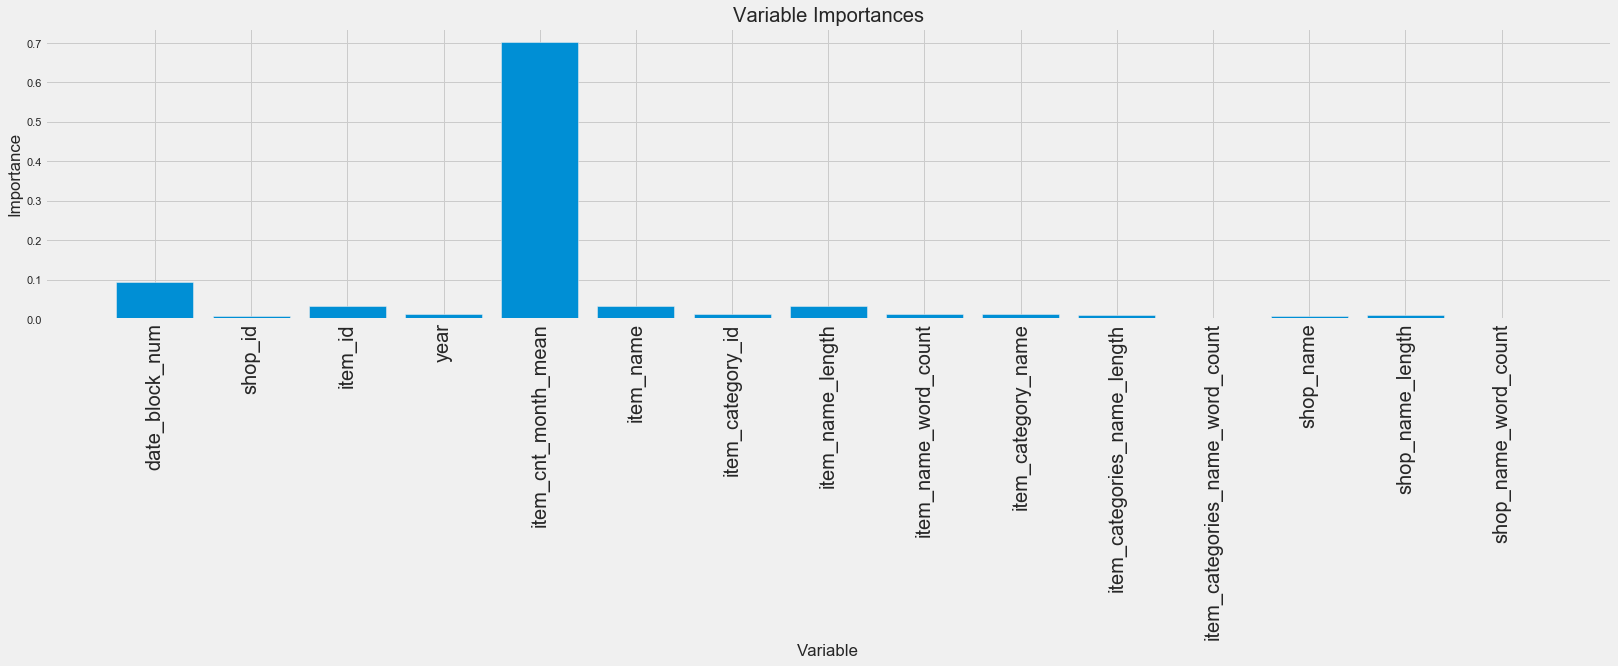

In [57]:
# Set the style
plt.style.use('fivethirtyeight')

#set size
fig = plt.figure(figsize=(25, 5))
ax = fig.add_subplot(111)

# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
ax.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical', fontsize=20)

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [63]:
rf_most_important = RandomForestRegressor(n_estimators=25, random_state=42, max_depth=15, n_jobs=-1)

# Extract the ten most important features
important_features = ['item_cnt_month_mean', 'date_block_num', 'year','item_id', 'item_name', 'item_name_length','item_name_word_count', 'item_category_id' ,'item_category_name','item_categories_name_length','shop_id']

#Full train
rf_most_important.fit(train[important_features], train['item_cnt_month'].clip(0., 20.))
print("Accuracy on training data considering variable importances:{}".format(round(rf_most_important.score(train[important_features], train['item_cnt_month'].clip(0., 20.))*100, 2)))


Accuracy on training data considering variable importances:69.72


In [96]:
test.head(10)

,ID,shop_id,item_id,month,year,date_block_num,item_cnt_month_mean,item_name,item_category_id,item_name_length,item_name_word_count,item_category_name,item_categories_name_length,item_categories_name_word_count,shop_name,shop_name_length,shop_name_word_count,item_cnt_month
0,0,5,5037,11,2015,34,1.444444,5037,19,30,5,19,10,3,5,22,3,0.0
1,1,5,5320,11,2015,34,0.000000,5320,55,31,7,55,35,5,5,22,3,0.0
2,2,5,5233,11,2015,34,2.000000,5233,19,56,8,19,10,3,5,22,3,0.0
3,3,5,5232,11,2015,34,1.000000,5232,23,59,9,23,15,4,5,22,3,0.0
4,4,5,5268,11,2015,34,0.000000,5268,20,36,6,20,10,3,5,22,3,0.0
5,5,5,5039,11,2015,34,1.833333,5039,23,35,6,23,15,4,5,22,3,0.0
6,6,5,5041,11,2015,34,2.500000,5041,20,30,5,20,10,3,5,22,3,0.0
7,7,5,5046,11,2015,34,2.000000,5046,55,28,5,55,35,5,5,22,3,0.0
8,8,5,5319,11,2015,34,5.727273,5319,55,19,4,55,35,5,5,22,3,0.0
9,9,5,5003,11,2015,34,0.000000,5003,20,36,5,20,10,3,5,22,3,0.0


In [97]:
test = test.fillna(0.)
test['item_cnt_month'] = 0.
test.head()

,ID,shop_id,item_id,month,year,date_block_num,item_cnt_month_mean,item_name,item_category_id,item_name_length,item_name_word_count,item_category_name,item_categories_name_length,item_categories_name_word_count,shop_name,shop_name_length,shop_name_word_count,item_cnt_month
0,0,5,5037,11,2015,34,1.444444,5037,19,30,5,19,10,3,5,22,3,0.0
1,1,5,5320,11,2015,34,0.000000,5320,55,31,7,55,35,5,5,22,3,0.0
2,2,5,5233,11,2015,34,2.000000,5233,19,56,8,19,10,3,5,22,3,0.0
3,3,5,5232,11,2015,34,1.000000,5232,23,59,9,23,15,4,5,22,3,0.0
4,4,5,5268,11,2015,34,0.000000,5268,20,36,6,20,10,3,5,22,3,0.0


In [98]:
train[important_features].head(5)

,item_cnt_month_mean,date_block_num,year,item_id,item_name,item_name_length,item_name_word_count,item_category_id,item_category_name,item_categories_name_length,shop_id
0,8.0,0,2013,32,32,3,1,40,40,10,0
1,3.0,0,2013,33,33,8,2,37,37,14,0
2,7.5,0,2013,35,35,13,3,40,40,10,0
3,1.0,0,2013,43,43,18,3,40,40,10,0
4,2.5,0,2013,51,51,52,6,57,57,12,0


In [99]:
test[important_features].head(5)

,item_cnt_month_mean,date_block_num,year,item_id,item_name,item_name_length,item_name_word_count,item_category_id,item_category_name,item_categories_name_length,shop_id
0,1.444444,34,2015,5037,5037,30,5,19,19,10,5
1,0.000000,34,2015,5320,5320,31,7,55,55,35,5
2,2.000000,34,2015,5233,5233,56,8,19,19,10,5
3,1.000000,34,2015,5232,5232,59,9,23,23,15,5
4,0.000000,34,2015,5268,5268,36,6,20,20,10,5


In [63]:
test['item_cnt_month'] = rf_most_important.predict(test[important_features]).clip(0., 20.)

In [62]:
test[['ID', 'item_cnt_month']].to_csv('submission_rf.csv', index=False)

In [77]:
def helper(s_id,i_id,month,year):
    out = []
    for i in range(11):
        out.append(0)
        
    out[1]=34
    out[2]=i_id
    out[5]=year
    out[10]=s_id
    
    return out

In [78]:
final_features = helper(14,1222,11,2015)


In [79]:
colm = ['item_cnt_month_mean', 'date_block_num', 'item_id', 'item_name', 'item_name_length', 'year',
                      'item_name_word_count', 'item_category_id' ,
                      'item_category_name','item_categories_name_length','shop_id']
input_variables = pd.DataFrame([final_features],columns=colm,dtype ='float',index =['input'])
                                     

In [80]:
input_variables

,item_cnt_month_mean,date_block_num,item_id,item_name,item_name_length,year,item_name_word_count,item_category_id,item_category_name,item_categories_name_length,shop_id
input,0.0,34.0,1222.0,0.0,0.0,2015.0,0.0,0.0,0.0,0.0,14.0


In [85]:
Y = test[colm].head(2)

In [83]:
check = rf_most_important.predict(input_variables).clip(0.,20)

In [86]:
Y

,item_cnt_month_mean,date_block_num,item_id,item_name,item_name_length,year,item_name_word_count,item_category_id,item_category_name,item_categories_name_length,shop_id
0,1.444444,34,5037,5037,30,2015,5,19,19,10,5
1,0.000000,34,5320,5320,31,2015,7,55,55,35,5


In [87]:
check = rf_most_important.predict(Y).clip(0.,20)

In [90]:
check.round(2)[0]

1.42

In [91]:
check1 = rf_most_important.predict(input_variables).clip(0.,20)

In [92]:
check1.round(2)[0]

0.0

In [ ]:
 important_features = ['item_cnt_month_mean', 'date_block_num', 'year','item_id', 'item_name', 'item_name_length','item_name_word_count', 'item_category_id' ,'item_category_name','item_categories_name_length','shop_id']


In [178]:
def  inputdata(s,id,m,y):
    out = []
    for i in range(11):
        out.append(0)
    icm = SIMA[(SIMA['item_id']==i) & (SIMA['shop_id']==s)]['item_cnt_month_mean'].values
    if(icm.size):
        out[0]=icc[0]
    out[1]=((y-2013)*12+m)-1
    out[2]=y
    out[3]=id
    iname = items[items['item_id']==id]['item_name'].values
    inval = leI_p.transform(iname.astype(str))
    out[4] =inval[0]
    out[5]=len(iname[0])
    out[6]=len(iname[0].split(' '))
    icid = items[items['item_id']==id]['item_category_id'].values
    out[7] = icid[0]
    icname =items_cat[items_cat['item_category_id']==icid[0]]['item_category_name'].values
    icnval = leIC_p.transform(icname.astype(str))
    out[8]=icnval[0]
    out[9]=len(icname[0])
    out[10]=s
    return out

    
    
    
    
    
    

In [181]:
temp = inputdata(50,1265,10,2014)

In [182]:
temp

[0, 21, 2014, 1265, 1265, 56, 9, 56, 56, 35, 50]

In [188]:
input_variables = pd.DataFrame([temp],columns=important_features,dtype ='int',index =['input'])

In [189]:
input_variables

,item_cnt_month_mean,date_block_num,year,item_id,item_name,item_name_length,item_name_word_count,item_category_id,item_category_name,item_categories_name_length,shop_id
input,0,21,2014,1265,1265,56,9,56,56,35,50


In [186]:
z =test[important_features].tail(2)

In [187]:
z

,item_cnt_month_mean,date_block_num,year,item_id,item_name,item_name_length,item_name_word_count,item_category_id,item_category_name,item_categories_name_length,shop_id
214198,0.000000,34,2015,19648,19648,31,5,40,40,10,45
214199,1.666667,34,2015,969,969,22,5,37,37,14,45


In [190]:
checki = rf_most_important.predict(input_variables).clip(0.,20)

In [192]:
checki[0].round(4)

0.0247

In [193]:
checkz = rf_most_important.predict(z).clip(0.,20)

In [195]:
checkz.round(4)

array([0.    , 1.1587])

In [196]:

SIMA.tail()

,shop_id,item_id,item_cnt_month_mean
424118,59,22154,1.000000
424119,59,22155,1.000000
424120,59,22162,3.200000
424121,59,22164,1.500000
424122,59,22167,1.333333


In [198]:
SIMA.to_csv('shop_item_sale.csv',index=False)

In [ ]:
#files needed
pkl rf
lei,leic
data
items,itemscat,sima

In [200]:
infile = open('random_forest_picklefile.pkl','rb')
RFI_pkl = pickle.load(infile)
infile.close()

In [201]:
RFI_pkl

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [202]:
leI

LabelEncoder()

In [203]:
leIC

LabelEncoder()

In [81]:
import pickle

In [94]:
filename = 'rfp_temp.pkl'
outfile = open(filename,'wb')

In [95]:
pickle.dump(rf_most_important,outfile)
outfile.close()

In [96]:
infile = open(filename,'rb')
RF_new = pickle.load(infile)
infile.close()

In [97]:
RF_new

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [98]:
rf_most_important

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [105]:
filename = 'leI.pkl'
outfile = open(filename,'wb')

In [106]:
pickle.dump(leI,outfile)
outfile.close()

In [79]:
filename = 'leI.pkl'

In [82]:
infile = open(filename,'rb')
leI_p = pickle.load(infile)
infile.close()

In [108]:
filename = 'leS.pkl'
outfile = open(filename,'wb')

In [109]:
pickle.dump(leS,outfile)
outfile.close()

In [110]:
infile = open(filename,'rb')
leS_p = pickle.load(infile)
infile.close()

In [105]:
filename = 'leIC.pkl'

In [111]:

outfile = open(filename,'wb')

In [112]:
pickle.dump(leIC,outfile)
outfile.close()

In [106]:
infile = open(filename,'rb')
leIC_p = pickle.load(infile)
infile.close()

In [107]:
leIC_p

LabelEncoder()

In [116]:
RF_new


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [66]:
SIMA.head()

,shop_id,item_id,item_cnt_month_mean
0,0,30,31.0
1,0,31,11.0
2,0,32,8.0
3,0,33,3.0
4,0,35,7.5


In [67]:
icc = SIMA[(SIMA['item_id']==32) & (SIMA['shop_id']==13)]['item_cnt_month_mean'].values


In [68]:
icc.size == True

True

In [72]:
icc[0].round(2)

2.57

In [75]:

nm = items[items['item_id']==6]['item_name'].values

In [76]:
nm[0]

'***УДАР ПО ВОРОТАМ (UNI)               D'

In [85]:
nameval = leI_p.transform(nm.astype(str))

In [87]:
nameval[0]

6

In [128]:
icatid =items[items['item_id']==7564]['item_category_id'].values

In [129]:
icatid[0]

58

In [ ]:
items['item_name_length'] = items['item_name'].map(lambda x : len(x)) 
items['item_name_word_count'] = items['item_name'].map(lambda x : len(x.split(' ')))

In [91]:
inl = len(nm[0])

In [92]:
inl

40

In [93]:
nm[0]

'***УДАР ПО ВОРОТАМ (UNI)               D'

In [94]:
inwc = len(nm[0].split(' '))

In [95]:
inwc

19

In [155]:
icn = items_cat[items_cat['item_category_id']==icatid[0]]['item_category_name'].values

In [156]:
icn

array(['Музыка - Винил'], dtype=object)

In [157]:
icn[0]

'Музыка - Винил'

In [158]:
 icnc = leIC_p.transform(icn.astype(str))

In [159]:
icnc

array([58], dtype=int64)

In [160]:
icnc[0]

58

In [146]:
icnl =len(icn[0])

In [147]:
icnl

14

In [148]:
icnwc=len(icn[0].split(' '))
icnwc

3

In [119]:
#formation of actual input taker

In [176]:
items.head(10)

,item_name,item_id,item_category_id,item_name_length,item_name_word_count
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40,41,14
1,!ABBYY FineReader 12 Professional Edition Full...,1,76,68,9
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40,45,26
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40,47,26
4,***КОРОБКА (СТЕКЛО) D,4,40,43,25
5,***НОВЫЕ АМЕРИКАНСКИЕ ГРАФФИТИ (UNI) ...,5,40,51,18
6,***УДАР ПО ВОРОТАМ (UNI) D,6,40,40,19
7,***УДАР ПО ВОРОТАМ-2 (UNI) D,7,40,42,19
8,***ЧАЙ С МУССОЛИНИ D,8,40,40,24
9,***ШУГАРЛЭНДСКИЙ ЭКСПРЕСС (UNI) D,9,40,45,16


In [122]:
items_cat.head()

,item_category_name,item_category_id,item_categories_name_length,item_categories_name_word_count
0,PC - Гарнитуры/Наушники,0,23,3
1,Аксессуары - PS2,1,16,3
2,Аксессуары - PS3,2,16,3
3,Аксессуары - PS4,3,16,3
4,Аксессуары - PSP,4,16,3


shop.head()

In [124]:
shop.head()

,shop_name,shop_id,shop_name_length,shop_name_word_count
0,"!Якутск Орджоникидзе, 56 фран",0,29,4
1,"!Якутск ТЦ ""Центральный"" фран",1,29,4
2,"Адыгея ТЦ ""Мега""",2,16,3
3,"Балашиха ТРК ""Октябрь-Киномир""",3,30,3
4,"Волжский ТЦ ""Волга Молл""",4,24,4


In [126]:
train[colm].head()

,item_cnt_month_mean,date_block_num,item_id,item_name,item_name_length,year,item_name_word_count,item_category_id,item_category_name,item_categories_name_length,shop_id
0,8.0,0,32,32,3,2013,1,40,40,10,0
1,3.0,0,33,33,8,2013,2,37,37,14,0
2,7.5,0,35,35,13,2013,3,40,40,10,0
3,1.0,0,43,43,18,2013,3,40,40,10,0
4,2.5,0,51,51,52,2013,6,57,57,12,0


In [127]:
test[colm].head()

,item_cnt_month_mean,date_block_num,item_id,item_name,item_name_length,year,item_name_word_count,item_category_id,item_category_name,item_categories_name_length,shop_id
0,1.444444,34,5037,5037,30,2015,5,19,19,10,5
1,0.000000,34,5320,5320,31,2015,7,55,55,35,5
2,2.000000,34,5233,5233,56,2015,8,19,19,10,5
3,1.000000,34,5232,5232,59,2015,9,23,23,15,5
4,0.000000,34,5268,5268,36,2015,6,20,20,10,5


colm = ['item_cnt_month_mean', 'date_block_num', 'item_id', 'item_name', 'item_name_length', 'year',
                      'item_name_word_count', 'item_category_id' ,
                      'item_category_name','item_categories_name_length','shop_id']

In [ ]:
def input_val(S,I,m,y):
    out =[]
    for i in range(11):
        out.append(0)
    
    

# from joblib import dump,load

In [70]:
from joblib import load,dump

In [71]:
dump(rf_most_important,'rf_jblibFile.joblib')

['rf_jblibFile.joblib']

In [73]:
with open(f'rf_jblibFile.joblib', 'rb') as f:
    rf_from_joblib = load(f)

In [74]:
rf_from_joblib

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [79]:
le_from_pkl

LabelEncoder()

In [80]:
le

LabelEncoder()